In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Citations:
1. https://www.mygreatlearning.com/blog/decision-tree-algorithm/
2. https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
3. https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/

***Overview***

Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas. In general, a decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical method for supervised learning. Decision trees are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The deicion rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model. 
Before we dive deep, let's get familiar with some of the terminologies:
    1. Instances: Refer to the vector of feature or attributes that define the input space
    2. Attribute: A quantity describing an instance
    3. Concept: The function that maps input to output
    4. Target Concept: The function that we are trying to find, i.e. The actual answer
    5. Hypothesis Class: Set of all the possible functions
    6. Sample: A set of inputs paired with a label, which is the correct output (also known as the Training Set)
    7. Candidate Concept: A concept which we think is the target concept
    8. Testing Set: Similar to the training set and is used to test the candidate concept and determine its performance

***Introduction***

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from the node Corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the  new nodes. 

Let us illustrate with the help of an example. Let's assume we want to play badminton on a particular day - say Saturday -- how will you decide whether to play or not. Let us say you go out and check if it's hot or cold, check the speed of the wind and humidity, how the weatgher is, i.e. is it sunny, cloudy, or rainy. You take all these factors into account to decide if you want to play or not.

So you calculate all these factors for the last ten days and form a lookup table like the one below.

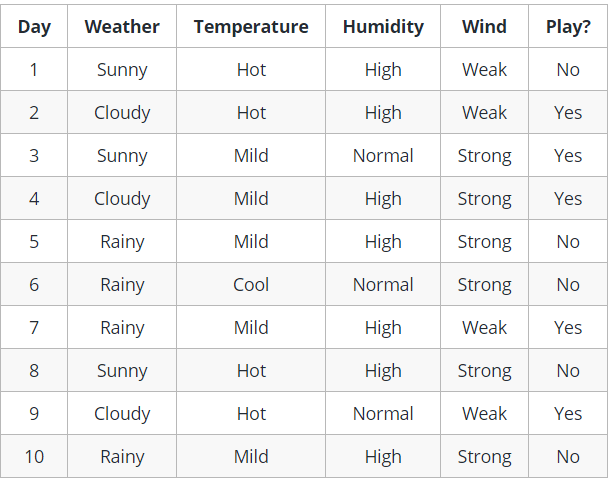

 
 Table 1. Observations of the last ten days

Now, you may use this table to decide whether to play or not. But, what if the weather pattern on Saturday does not match with any of rows in the table? This may be a problem. A decision tree would be a great way to represent data like this because it takes into account all the possible paths that can lead to the final decision by following a tree-like structure.

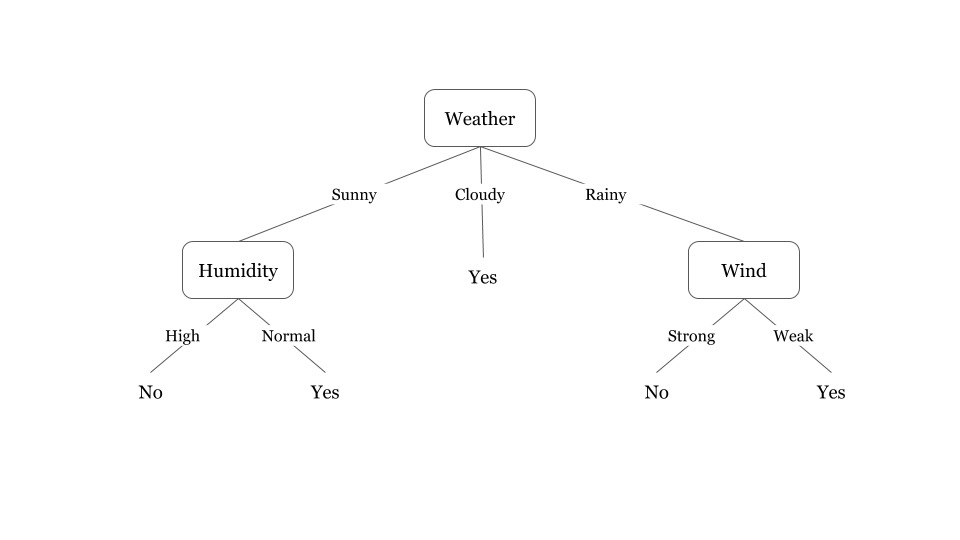

Fig1. A decision tree for the concept Play Badmintion

Fig. 1. illustrates a learned decision tree. We can see that each node represents an attribute or feature and the branch from each node represents the outcome of that node. FInally, its the leaves of the tree where the final decision is made. If features are continuous, internal nodes can test the value of feature against the threshold.

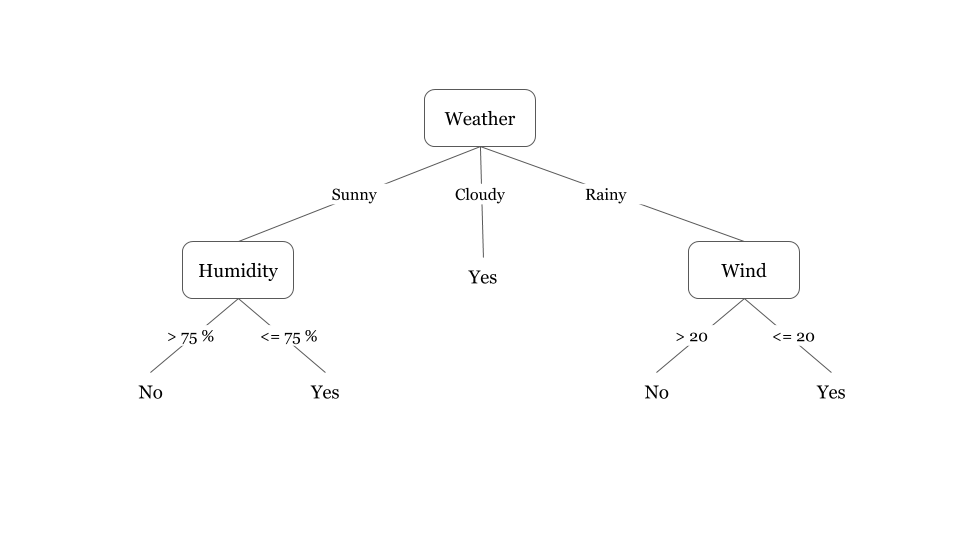

Fig 2. A decision tree for the concept Play Badmintion (when the attributes are continuous)

A general algorithm for a decision tree can be described as follows:
    
    1. Pick the best attribute/featuere. The best attribute is one which best splits or separates the data.
    2. Ask the relevant question
    3. Follow the answer path.
    4. Go to step 1 until you arrive to the answer.
The best split is one which separates two different labels into two sets.

***Expressiveness of decision trees***

Decision trees can represent any boolean function of the input attributes. Let's use decision trees to perform the function of three boolean gates AND, OR  and XOR.

Boolean Function: AND

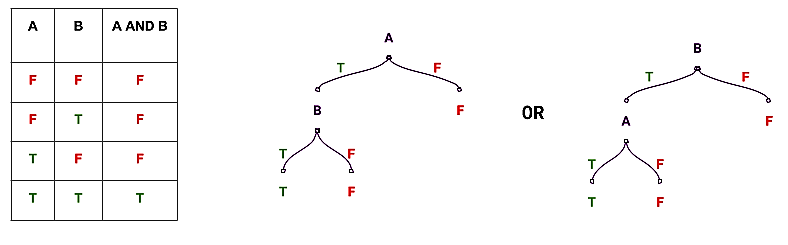

Fig: Decision tree for an AND Operation

In above figure we can see that there are two candidate concepts for producing the decision tree that performs the AND operation. Similarly, we can also produce a decision tree that performs the boolean OR operation.

Boolean Function : OR

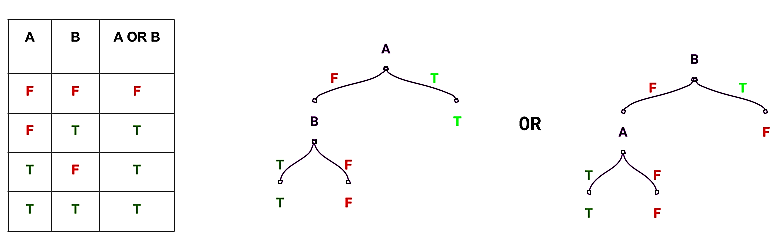

Fig: Decision Tree for OR Operation

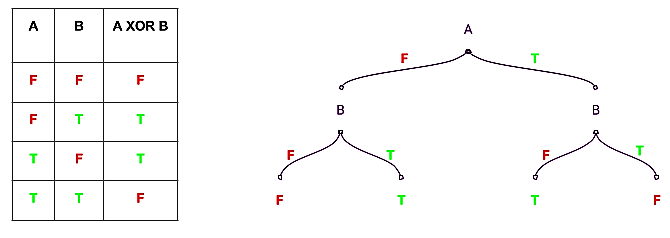

Fig: Decision tree for an XOR operation.

Let us produce a decision tree performing XOR functionality using 3 attributes:

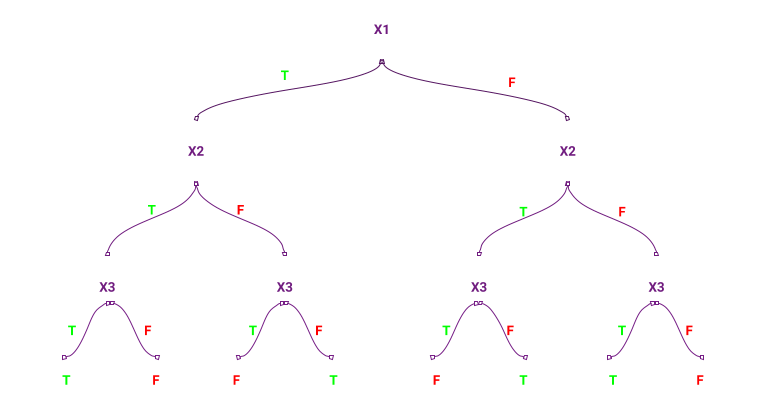

Fig: Decision tree for an XOR operation involving three operands

In the decision tree, shown above figure for three attributes there are 7 nodes in the tree i.e. for $n = 3$ number of nodes = $2^3-1$. Similarly, if we have $n$ attributes, there are $2^n$ nodes(approx.) in the decision tree. So, the tree requires exponential number of nodes in the worst case.

We can represent boolean operations using decision trees. But, what other kind of functions can we represent and if we search over the various possible decision trees to find the right one, how many decision trees do we have to worry about. Let's answer  this question by finding out the possible numbers of decision trees we can generate given N different attributes (assuming the attributes are boolean). SInce a truth table can be transformed into a decision tree, we will form a truth table of N attributes as input.

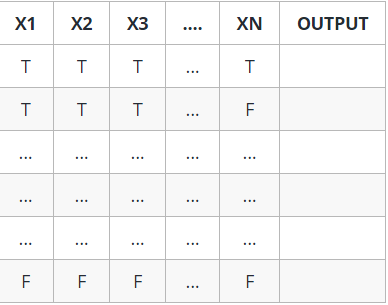

The above truth table has $2^n$ rows (i.e. the number of nodes in the decision tree), which represents the possible combinations of the input attributes, and since each node can a hold a binary value, the number of ways to fill the values in the decision tree is ${2^{2^n}}$. Thus, the space of decision trees, i.e. the hypothesis space of the decision tree is very expressive because there are a lot of different functions it can represent. But, it also means one needs to have a clever way to search the best tree among them.

Decision tree boundary

Decision trees divide the feature space into axis-parallel rectangles or hyperplanes. Let’s demonstrate this with help of an example. Let’s consider a simple AND operation on two variables (see Fig 3.). Assume X and Y to be the coordinates on the x and y axes, respectively, and plot the possible values of X and Y (as seen the table below). Fig 7. represents the formation of the decision boundary as each decision is taken. We can see that as each decision is made, the feature space gets divided into smaller rectangles and more data points get correctly classified.

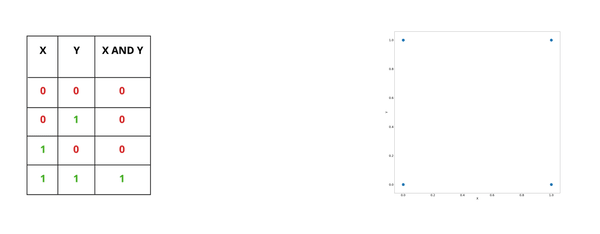

 Fig 7. Animation showing the formation of the decision tree boundary for AND operation

**The decision tree learning algorithm**

The basic algorithm used in decision trees is known as the ID3 (by Quinlan) algorithm. The ID3 algorithm builds decision trees using a top-down, greedy approach. Briefly, the steps to the algorithm are: - Select the best attribute → A - Assign A as the decision attribute (test case) for the NODE. - For each value of A, create a new descendant of the NODE. - Sort the training examples to the appropriate descendant node leaf. - If examples are perfectly classified, then STOP else iterate over the new leaf nodes.

Now, the next big question is how to choose the best attribute. For ID3, we think of the best attribute in terms of which attribute has the most information gain, a measure that expresses how well an attribute splits that data into groups based on classification.

Pseudocode: ID3 is a greedy algorithm that grows the tree top-down, at each node selecting the attribute that best classifies the local training examples. This process continues until the tree perfectly classifies the training examples or until all attributes have been used.

The pseudocode assumes that the attributes are discrete and that the classification is binary. Examples are the training example. Target_attribute is the attribute whose value is to be predicted by the tree. Attributes is a list of other attributes that may be tested by the learned decision tree. Finally, it returns a decision tree that correctly classifies the given Examples.

ID3(Examples, Target_attribute, Attributes): - Create a root node for the tree. - If all Examples are positive, return the single-node tree root, with positive labels. - If all Examples are negative, return the single-node tree root, with negative labels. - If Attributes is empty, return the single-node tree root, with the most common labels of the Target_attribute in Examples. - Otherwise, begin - A ← the attribute from Attributes that best* classifies Examples - The decision attribute for root ← A - For each possible value $v_i$, of A, - Add a new tree branch below root, corresponding to the test A = $v_i$ - Let Examples_vi be the subset of Examples that have value $v_i$ for A. - If Examples_vi is empty - Then, below this new branch add a leaf node with the labels having the most common value of Target_attribute in Examples. - Else, below this new branch add the subtree(or call the function) - ID3(Examples_vi, Target_attribute, Attributes-{A}) - End - Return root

* Adopted from Machine Learning by Tom M. Mitchell*

*The best attribute is the one with the highest information gain.

## Calculating information gain

As stated earlier, information gain is a stastical property that measures how well a given attribute separates the training examples according to their target classification.
In the figure below, we can see that an attribute with low information gain (right) splits the data relatively evenly and as a result doesn't bring us any closer to a decision. Whereas, an attribute with high information gain (left) splits the data into groups with an uneven number of positives and negatives and a result helps in separating the two from each other.

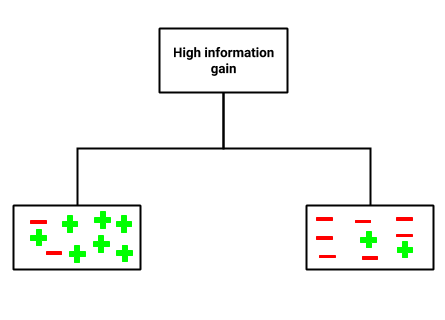

Fig 8. Distribution of points in case of high and low information gain

TO define information gain precisely, we need to define a measure commonly used in information theory called entropy that measures the level of impurity in a group of examples. Mathematically, it is defined as:
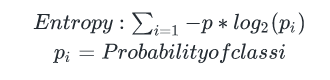

Since the basic version of the ID3 algorithm deal with the case where classification are either positive or negative, we can define entropy as:
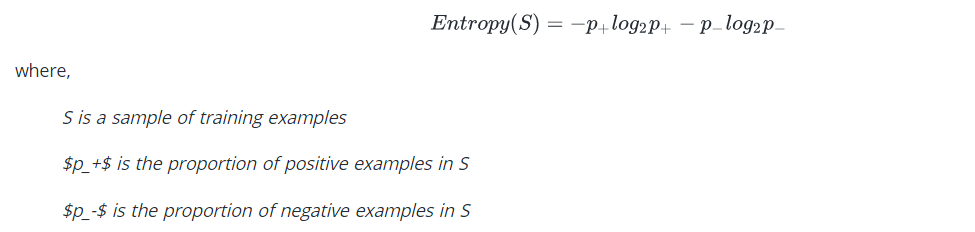

To illustrate, suppose S is a sample containing 14 boolean examples, with 9 positive and 5 negative examples. Then, the entropy of S relative to this boolean classification is:

Entropy ([9+, 5-]) = -(9/14)$\cdot log_2$(9/14) - (5/14)$\cdot log_2$(5/14) = 0.940

Note that entropy is 0 if all the members of S belong to the same class. For example, all members are positive ($p_+$=1), then $p_-$ is 0, and Entropy(S) = -1$\cdot log_2$(1)-0$\cdot log_2$(0) = 0. Entropy is 1 when the sample contains an equal number of positive and negative examples. If the sample contains unequal number of positive and negative examples, entropy is between 0 and 1. The following figure shows the form of the entropy function relative to a boolean classification as $p_+$ varies between 0 and 1.

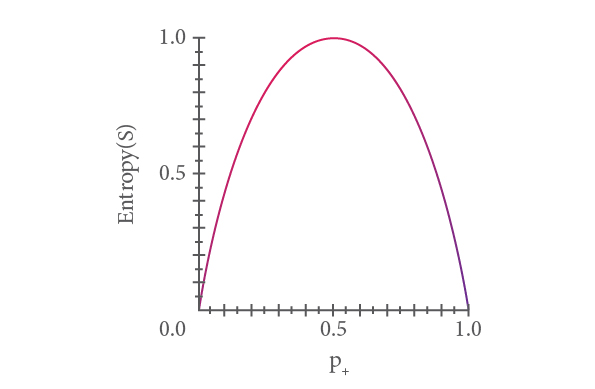
 Fig 9. Entropy function to a boolean classification, as the proportion $p_+$, of positive examples varies between 0 & 1.

Now given entropy as measure of the impurity in a sample of training examples, we can now define information gain as a measure of the effectiveness of an attributes in classifying the training data. Information gain, Gaion (S,A) of an attribute A, relative to a sample of examples S, is defined as:

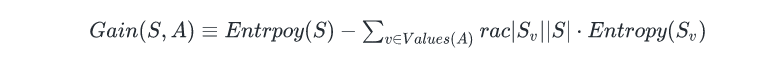

where Value(A) is the set of all possible values for attribute the A, and $S_v$ is the subset of S for which attribute A has value v. Note the first term in the equation is just entropy of the original sample S, and the second term is the expected value of entropy after S is partitioned using attribute A i.e. Entropy of its children.Expected entropy described by this second term is simply the sum of entropies of each subset $S_v$, weighted by the fraction of examples $↑rac{|S_v|}{|S|}$that belong to $S_v$. Gain(S, A) is therefore the expected reduction in entropy caused by knowing the value of attribute A.

In short:
InformationGain = Entropy(parentnode)-[AverageEntropy(children)]

for example, suppose a sample (S) has 30 instances (14 positive and 16 negative labels) and an attribute A divides the samples into two subsamples of 17 instances (4 negative and 13 positive labels) and 13 instances(1 positie and 12 negative labels)

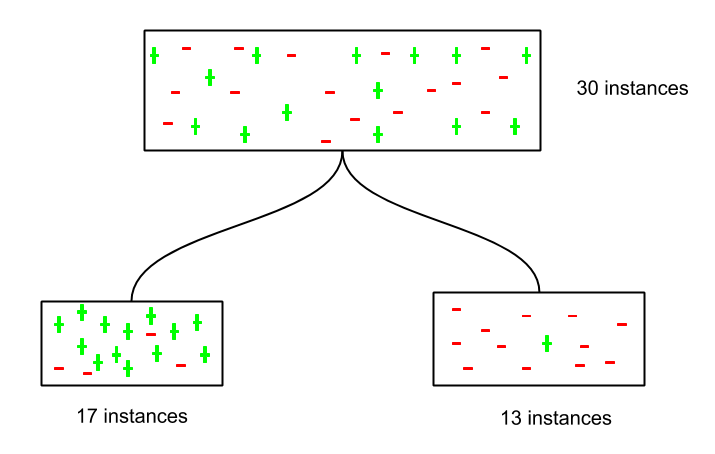

 Fig 10. Example of decision tree sorting instances based on information gain.

Let's calculate the information gain of the attribute A. We Know that:
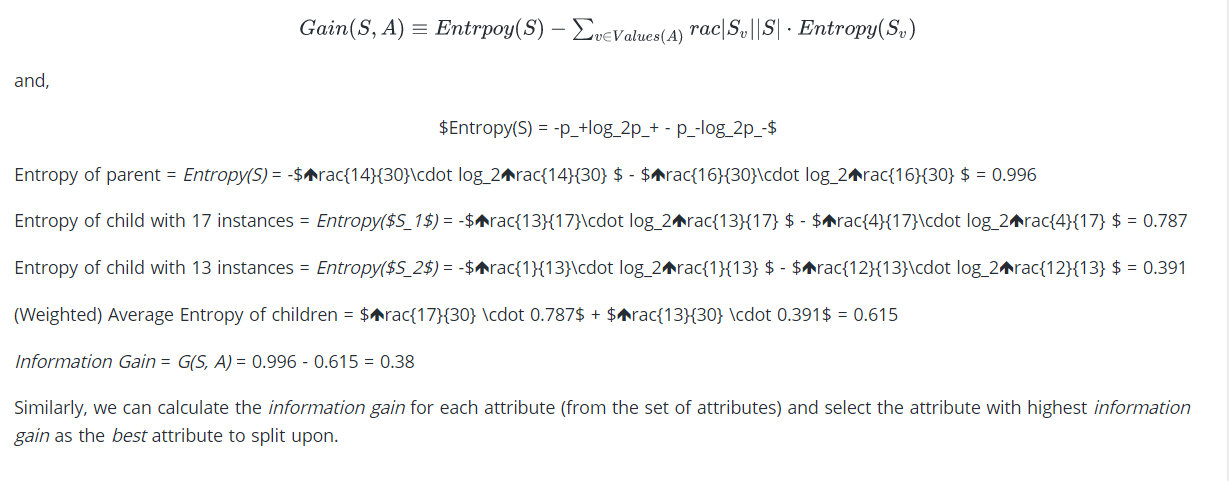

## Coding a decision tree
We will use the scikit-learn library to build the decision tree model. We will be using the iris dataset to build a decision tree classifier. The data set contains information of 3 classes of the iris plant with the following attributes:- sepal length - sepal width - petal length - petal width - class: Iris Setosa, Iris Versicolour, Iris Virginica


In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# The scikit-learn dataset library already has the iris dataset. You can either use dataset from the source or import it from scikit-learn datset library
data = load_iris()
print('Classes to predict: ', data.target_names)

There are three classes of iris plants: 'setosa','versicolor' and virginica. Now, we have imported the iris data in the variable 'data'. We will now extract the attribute data and the corresponding labels. We can extract the attributes and labels by calling .data and .target as shown below:

In [ ]:
#Extracting data attributes
X = data.data
### Extracting target / class labels
y = data.target

print("Number of examples in the data:", X.shape[0])

In [ ]:
#First four rows in the variable 'X'
X[:4]

Now that we have extracted the data attributes and corresponding labels, we will split them to from train and test datasets. For this purpose, we will use the scikit-learn's 'train_test_split' function, which takes in the attributes and labels as inputs and produces the train and test sets.

In [ ]:
# Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=47, test_size=0.25)

Since, this is a classification problem, we will import the DecisionTreeClassifier function from the sklearn library. Next, we will set the 'criterion' to 'éntropy', which sets the measure for splitting the attribute to information gain.

In [ ]:
# Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

Next, we will fit the classifier on the train attributes and labels.

In [ ]:
# Training the decision tree classifier.
clf.fit(X_train, y_train)

Now, we will use the trained classifier/ model to predict the labels of the test attributes.

In [ ]:
# Predicting labels on the test set.
y_pred = clf.predict(X_test)

We will now evaluate the predicted classes using some metrics. For this case, we will use 'accuuracy_score' to calculate the accuracy of  the predicted labels.

In [ ]:
# Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
      

Next, we will tune the parameteres of the decision tree to increase its accuracy. One of those parameters is 'min_samples_split', which is the minimum number of samples required to split an internal node. Its default value is equal to 2 because we cannot split on node containing only one example/sample.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

We can see that the accuracy on the test set increased, while it decreased on the training set. This is because increasing the value of the min_sample_split smoothens the decision boundary and thus prevents it from overfitting. You may tune other parameters of the decision tree and check how they affect the decision boundary in a similar way. You can check the other parameter here:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

## Isues in decision trees
Avoiding Overfitting

Since the ID3 algorithm continues splitting on attributes until either it classifies all the data points or there are no more attribute to splits on. As a result, it is prone to creating decision trees that overfit by performing really well on the training data at the expense of accuracy with respect to entire distribution of data.

There are, in general, two approaches to avoid this in decision trees: Allow the tree to grow until it overfits and the prune it. - Prevent the tree from growing too deep by stopping it before it perfectly classifies the training data.

A decision tree's growth is specified in terms of the number of layers, or depth, it's allowed to have. The data available on train the decision tree is split into training and testing data and then trees of various sizes are created with the help of the training data and tested on the test data. Cross-validation can also be used as part of this approach. Pruning the tree, on the other hand, involves testing the original tree against pruned versions of it. Leaf nodes are removed from the tree as long as the pruned tree performs better on the test data than the larger tree.

## Incorporating continuous valued attributes

Our initial definition of ID3 is restricted to attributes that take on a discrete set of values. One way to make the ID3 algorithm more useful with continuous variables is to turn them, in a way, into discrete variables. Let's say in our example play badminton the temperature is continuous, we could test the information gain of certain partitions of the temperature values, such as temperature > 42.5. Typically, whenever the classification changes from no to yes or yes to no, the average of the two temperatures is taken as a 


## Incorporating continuous valued attributes
Our initial definition of ID3 is restricted to attributes that take on a discrete set of values. One way to make the ID3 algorithm more useful with continuous variables is to turn them, in a way, into discrete variables. Let’s say in our example of Play Badminton the temperature is continuous (see the following table), we could test the information gain of certain partitions of the temperature values, such as temperature > 42.5. Typically, whenever the classification changes from no to yes or yes to no, the average of the two temperatures is taken as a potential partition boundary.

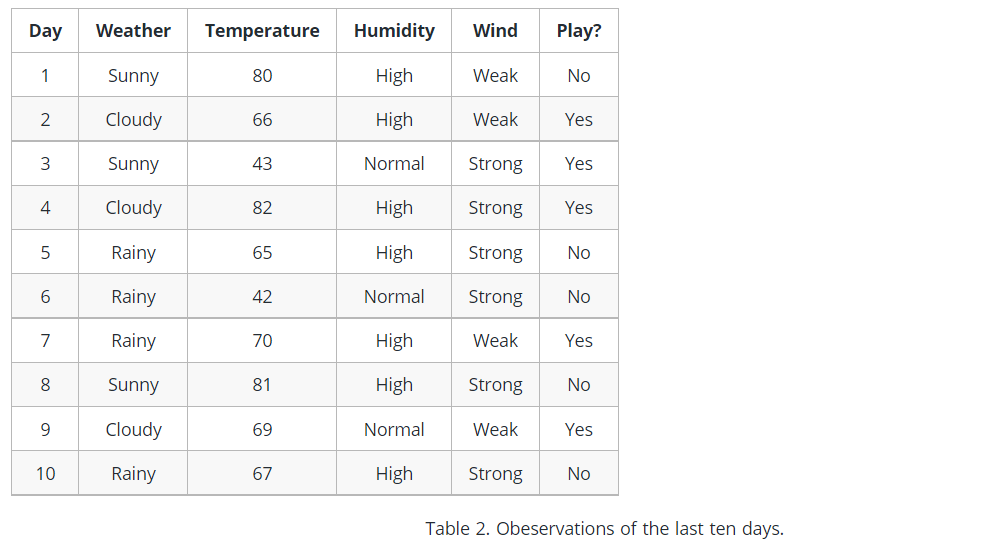

Because 42 corresponds to No and 43 corresponds to Yes, 42.5 becomes a candidate. If any of the partitions end up exhibiting the greatest information gain, then it is used as an attribute and temperature is removed from the set of potential attributes to split on.

## Alternative measures for selecting attributes
The information gain formula used by ID3 algorithm treats all of the variables the same regardless of their distribution and their importance. This is a problem when it comes to continuous variables or discrete variables with many possible values because training examples may be few and far between for each possible value, which leads to low entropy and high information gain by virtue of splitting the data into small subsets but results in a decision tree that might not generalize well.

One way to avoid this is to use some other measure to find the best attribute instead of information gain. An alternative measure to information gain is gain ratio (Quinlan 1986). Gain ratio tries to the correct the information gain’s bias towards attributes with many possible values by adding a denominator to information gain called split information. Split Information tries to measure how broadly and uniformly the attribute splits the data:

$SplitInformation(S, A) = - \sum_{i=1}^{c}rac{|S_i|}{|S|} \cdot log_2 rac{|S_i|}{|S|}$
The Gain Ratio is defined in terms of Gain and SplitInformation as,

$Gain Ratio(S, A) \equiv rac{Gain(S, A)}{SplitInformation(S, A)}$
One practical issue that arises in using gain ratio in place of information gain is that the denominator can be zero or very small when $|S_i|pprox|S|$ for one of the $S_i$. This either makes the Gain ratio undefined or very large for attributes that happen to have the same value for nearly all members of S.For example, if there’s just one possible value for the attribute, then the formula equals $log_2$1 = 0.Luckily, we tend not to include attributes with 1 possible value in our training data because it is impossible to carry out the ID3 algorithm by splitting on an attribute with only 1 value, so Gain ratio doesn’t have to handle the possibility of a denominator of 0. On the other hand, our continuous temperature example has 10 possible values in our training data, each of which occur once, which leads to -(1/10)$\cdot log_2$(1/10) = $log_2$10 . In general, the SplitInformation of an attribute with n equally distributed values is $log_2n$. These relatively large denominators significantly affect an attribute’s chances of being the best attribute after an iteration of the ID3 algorithm and help in avoiding choices that perform particularly well on the training data but not so well outside of it.

## Advantages and Disadvantages
Following are the advantages of decision trees: - Easy to use and understand. - Can handle both categorical and numerical data. - Resistant to outliers, hence require little data preprocessing. - New features can be easily added. - Can be used to build larger classifiers by using ensemble methods.

Following are the disadvantages of decision trees: - Prone to overfitting. - Require some kind of measurement as to how well they are doing. - Need to be careful with parameter tuning. - Can create biased learned trees if some classes dominate.

**Decision Tree**

This alogrithm is one such widely used algorithm. A decision tree is an upside-down tree that makes decision bvased on the conditions present in the data. Now the question arises why decision tree? Why not other algorithms? the answer is quite simple as the decision tree gives us amazing results when the data is mostly categorical in nature and depends on the conditions. 




In the above figure, the conditions such as the salary, office location and facilities go on splitting into branches until they come to a decision where a person should accept or decline the job offer. The conditions are known as the internal nodes and they split to come to decision wich is known as leaf.

*Two types of Decision Tree*
1. Classification
2. Regression

Classification trees are applied on data when the outcome is discrete in nature or is categorical such as presence or absence of students in a class, a person died or survived, approval of loan etc. But Regression tree are used when the outcome of the data is continuous in nature such as prices, age of a person, length of stay in a hotel, etc.

***Assumptions***
Despite such simplicity of a decision tree, it holds certain assumptions like:

1. Discretization of continuous variables is required
2. The data taken for traning should be wholly considered as root
3. Distribution of records is done in a recursive manner on the basis of attribute values.

***Algorthims used in Decision Tree***
Different libraries of different programming languages use particular default algorithms to build a decision tree but is quite unclear for a data scientist to understand the difference between the algorithms used. Here we will discuss those algorithms.

1. ID3

ID3 generates a tree by considering the whole set S as the root node. It then iterates on every attribute and splits the data into fragments known as subsets to calculate the entropy or the information gain of that attribute. After splitting, the algorithm recourses on every subset by taking those attributes which were not taken before into the iterated ones. It is not an ideal algorithm as it generally overfits the data and on continuous variables, splitting the data can be time consuming.

2. C4.5

It is quite advanced compared to ID3 as it considers the data which are classified samples. The splitting is done based on the normalized information gain and the feature having the highest information gain makes the decision. Unlike ID3, it can handle both continuous and discrete attributes very efficiently and after building a tree, it undergoes pruning by removing all the branches having low importance.
